# Линейная регрессия

Данные содержатся в файле `data/lin_reg.txt`. Прочитать их можно следующим так:

При выполнении заданий **нельзя** пользоваться `scikit-learn` и т.п., только `numpy` и `matplotlib`.

1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 
2. Подготовьте исходные данные для 5 fold CV.
3. С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.
4. Постройте валидационную кривую. 
5. Постройте кривую обучения.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
D = np.loadtxt('data/lin_reg.txt', delimiter=',')
X = D[:, :-1]
Y = D[:, -1]

In [3]:
X = np.hstack((np.ones((X.shape[0],1)), X))

In [4]:
def model(x, y, alpha=0.0):
    n_col = x.shape[1]
    return np.linalg.inv(x.T @ x + alpha * np.identity(n_col)) @ x.T @ y

In [5]:
def mse(pred, y):
    return np.sum(np.square(pred - y)) / len(y)

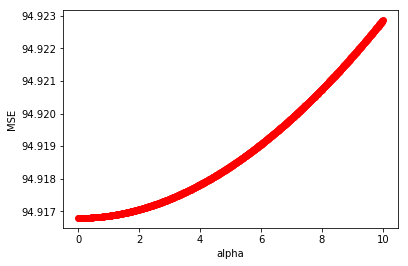

In [6]:
plt.xlabel("alpha")
plt.ylabel("MSE")

alphas = np.linspace(0, 10, num=1000)
for alpha in alphas:
    theta = model(X, Y, alpha)
    pred = theta @ X.T
    loss = mse(pred, Y)
    plt.plot(alpha, loss, 'ro')

In [7]:
def cross_validation(X, Y, n=5):
    step = int(len(X) / n)    
    for i in range(n):
        test_x = X[i * step:i * step + step]
        test_y = Y[i * step:i * step + step]
        
        left_x = X[:i * step]
        left_y = Y[:i * step]
        right_x = X[i * step + step:]
        right_y = Y[i * step + step:]
        
        train_x = np.concatenate((left_x, right_x))
        train_y = np.concatenate((left_y, right_y))
        yield (train_x, train_y), (test_x, test_y)

In [8]:
def mean_losses(alpha, validations=5):
    total_loss_train = 0
    total_loss_test = 0
    for (train_x, train_y), (test_x, test_y) in cross_validation(X, Y, n=validations):
        theta = model(train_x, train_y, alpha)
        pred_train = theta @ train_x.T
        pred_test = theta @ test_x.T
        total_loss_train += mse(pred_train, train_y)
        total_loss_test += mse(pred_test, test_y)

    mean_loss_train = total_loss_train / validations
    mean_loss_test = total_loss_test / validations
    
    return mean_loss_train, mean_loss_test

In [9]:
def optimal_alpha(min_alpha, max_alpha, n_alpha=1000, validations=5):
    MAX = 9999999
    result = 0
    
    alphas = np.linspace(min_alpha, max_alpha, num=n_alpha)
    for alpha in alphas:
        mean_loss_train, mean_loss_test = mean_losses(alpha, validations)
        difference = abs(mean_loss_train - mean_loss_test)
        if difference < MAX:
            MAX = difference
            result = alpha
    
    return result

In [10]:
optimal_alpha(0, 10000, 15000)

1852.1234748983265

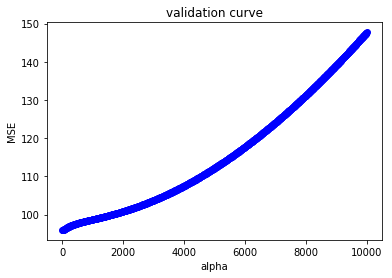

In [11]:
plt.title("validation curve")
plt.xlabel("alpha")
plt.ylabel("MSE")

alphas = np.linspace(0, 10000, num=1000)
for alpha in alphas:
    _, mean_loss_test = mean_losses(alpha)
    plt.plot(alpha, mean_loss_test, 'bo')

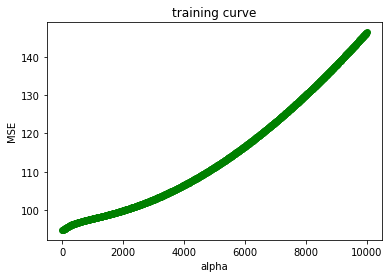

In [12]:
plt.title("training curve")
plt.xlabel("alpha")
plt.ylabel("MSE")

alphas = np.linspace(0, 10000, num=1000)
for alpha in alphas:
    mean_loss_train, _ = mean_losses(alpha)
    plt.plot(alpha, mean_loss_train, 'go')